In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os
import copy

plt.ion()   # interactive mode

data_dir = "data_preprocessed/"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    
    def __call__(self, image):
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        
        return torch.from_numpy(image.transpose((2, 0, 1)))

data_transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [3]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transform)
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=14)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes
print(image_datasets["test"][0][0].size())

torch.Size([3, 32, 32])


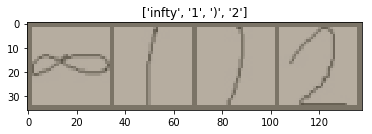

In [4]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 50, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(50, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 82)

    def forward(self, x):
        x=x.to(device)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
from torchsummary import summary

summary(net, input_size = (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 50, 28, 28]           3,800
         MaxPool2d-2           [-1, 50, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]          20,016
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 82]           9,922
Total params: 81,858
Trainable params: 81,858
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.39
Params size (MB): 0.31
Estimated Total Size (MB): 0.71
----------------------------------------------------------------


In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloaders["train"], 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

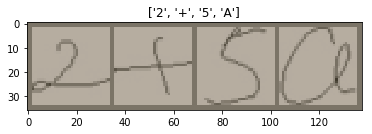

Process Process-173:
Process Process-171:
Process Process-179:
Process Process-174:
Process Process-172:
Process Process-177:
Process Process-169:
Process Process-170:
Process Process-180:
Process Process-175:
Process Process-182:
Process Process-178:
Traceback (most recent call last):
Process Process-176:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-181:
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/deepafricai/anaconda3/l

  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/home/deepafricai/anaconda3/lib/python3.6/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/connection.py", line 911, in wait
    ready = selector.select(timeout)
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/connec

In [24]:
dataiter = iter(dataloaders['test'])
images, classes = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images), title=[class_names[x] for x in classes])

outputs = net(images)

In [25]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[x] for x in predicted))
#class_names[x] for x in classes

Predicted:      2     +     S     A


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in dataloaders["test"]:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on test images: 95 %


In [11]:
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([50, 3, 5, 5])
conv1.bias 	 torch.Size([50])
conv2.weight 	 torch.Size([16, 50, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([82, 120])
fc2.bias 	 torch.Size([82])
Optimizer's state_dict:
state 	 {139654239954336: {'momentum_buffer': tensor([[[[-0.0117, -0.0399, -0.0476, -0.0482, -0.0421],
          [-0.0082, -0.0256, -0.0262, -0.0421, -0.0391],
          [-0.0403, -0.0256, -0.0052, -0.0384, -0.0478],
          [-0.0460, -0.0485, -0.0266, -0.0214, -0.0342],
          [-0.0478, -0.0525, -0.0418, -0.0111, -0.0199]],

         [[-0.0117, -0.0399, -0.0476, -0.0482, -0.0421],
          [-0.0082, -0.0256, -0.0262, -0.0421, -0.0391],
          [-0.0403, -0.0256, -0.0052, -0.0384, -0.0478],
          [-0.0460, -0.0485, -0.0266, -0.0214, -0.0342],
          [-0.0478, -0.0525, -0.0418, -0.0111, -0.0199]],

         [[-0.0117, -0.0399, -0.0476, -0.0482, -0.0421],
        

In [12]:
torch.save(net.state_dict(), "saved_model.pt")

In [7]:
model = Net()
model.load_state_dict(torch.load("saved_model.pt"))
model.eval()
model.to(device)

Net(
  (conv1): Conv2d(3, 50, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(50, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=82, bias=True)
)

In [41]:
loader = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
def image_loader(image_name):
    image = Image.open(image_name)
    print(image.mode)
    image = loader(image).float()
    
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    
    return image.cuda()  #assumes that you're using GPU

image = image_loader("testImage.jpg")
output = model(image)
_, predicted = torch.max(output.data, 1)

RGB


In [42]:
print('Predicted: ', ' '.join('%5s' % class_names[x] for x in predicted))


Predicted:  ldots


In [43]:
predicted

tensor([53], device='cuda:0')